# Our target is to analyse the trend of the covid cases and predict the number of confirmed cases that may arise in future.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

C:\Users\GyanTripathi-TALENT\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/aggregate_covid_country.csv')
print(data.tail())
print('*'*70)
print('Data Shape is ',data.shape)

             Date             Country  Confirmed  Recovered  Deaths
23683  2020-05-26  West Bank and Gaza        429        365       3
23684  2020-05-26      Western Sahara          9          6       1
23685  2020-05-26               Yemen        249         10      49
23686  2020-05-26              Zambia        920        336       7
23687  2020-05-26            Zimbabwe         56         25       4
**********************************************************************
Data Shape is  (23688, 5)


In [3]:
data.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [4]:
data.isna().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

This result suggests there is no null value in our data

In [5]:
data.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


Above results gives us an idea that our data is highly skewed and outliers are present in it as the 75% of our data is smaller than 100% considerably but we will deal it later in the code.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [7]:
data.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [8]:
countries=len(data.Country.unique())
countries

188

In [9]:
#Checking the unique values counts in the columns
unq_val = data.select_dtypes(include= "object")
for i in data.columns:
    print(i)
    print(data[i].value_counts(),"\n")

Date
2020-01-22    188
2020-04-10    188
2020-04-23    188
2020-04-22    188
2020-04-21    188
             ... 
2020-02-28    188
2020-02-27    188
2020-02-26    188
2020-02-25    188
2020-05-26    188
Name: Date, Length: 126, dtype: int64 

Country
Afghanistan    126
Oman           126
Namibia        126
Nepal          126
Netherlands    126
              ... 
Gambia         126
Georgia        126
Germany        126
Ghana          126
Zimbabwe       126
Name: Country, Length: 188, dtype: int64 

Confirmed
0         8056
1          799
2          310
3          293
16         223
          ... 
27944        1
2792         1
90980        1
784708       1
1211         1
Name: Confirmed, Length: 5308, dtype: int64 

Recovered
0        11100
1          866
2          517
4          264
3          262
         ...  
3318         1
1703         1
76946        1
9183         1
2636         1
Name: Recovered, Length: 3303, dtype: int64 

Deaths
0        12989
1         1244
2          655
3  

Let's seprate date (YYYY,MM,DD) from the above dataset so that in future we can predict using date

In [10]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date']

0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
23683   2020-05-26
23684   2020-05-26
23685   2020-05-26
23686   2020-05-26
23687   2020-05-26
Name: Date, Length: 23688, dtype: datetime64[ns]

In [11]:
#Year
data['Date'].dt.year

0        2020
1        2020
2        2020
3        2020
4        2020
         ... 
23683    2020
23684    2020
23685    2020
23686    2020
23687    2020
Name: Date, Length: 23688, dtype: int64

In [12]:
#Month
data['Date'].dt.month

0        1
1        1
2        1
3        1
4        1
        ..
23683    5
23684    5
23685    5
23686    5
23687    5
Name: Date, Length: 23688, dtype: int64

In [13]:
#Day
data['Date'].dt.day

0        22
1        22
2        22
3        22
4        22
         ..
23683    26
23684    26
23685    26
23686    26
23687    26
Name: Date, Length: 23688, dtype: int64

In [14]:
#Now, we have our data sepratred so let's add it into our main dataframe

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data

,Date,Country,Confirmed,Recovered,Deaths,Year,Month,Day
0,2020-01-22,Afghanistan,0,0,0,2020,1,22
1,2020-01-22,Albania,0,0,0,2020,1,22
2,2020-01-22,Algeria,0,0,0,2020,1,22
3,2020-01-22,Andorra,0,0,0,2020,1,22
4,2020-01-22,Angola,0,0,0,2020,1,22
...,...,...,...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3,2020,5,26
23684,2020-05-26,Western Sahara,9,6,1,2020,5,26
23685,2020-05-26,Yemen,249,10,49,2020,5,26
23686,2020-05-26,Zambia,920,336,7,2020,5,26


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       23688 non-null  datetime64[ns]
 1   Country    23688 non-null  object        
 2   Confirmed  23688 non-null  int64         
 3   Recovered  23688 non-null  int64         
 4   Deaths     23688 non-null  int64         
 5   Year       23688 non-null  int64         
 6   Month      23688 non-null  int64         
 7   Day        23688 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 1.4+ MB


In [16]:
#Let's drop the date column
data.drop(['Date'], axis=1, inplace=True)

In [17]:
data.drop('Year', axis = 1, inplace = True)
data

,Country,Confirmed,Recovered,Deaths,Month,Day
0,Afghanistan,0,0,0,1,22
1,Albania,0,0,0,1,22
2,Algeria,0,0,0,1,22
3,Andorra,0,0,0,1,22
4,Angola,0,0,0,1,22
...,...,...,...,...,...,...
23683,West Bank and Gaza,429,365,3,5,26
23684,Western Sahara,9,6,1,5,26
23685,Yemen,249,10,49,5,26
23686,Zambia,920,336,7,5,26


Since, in the Year column, it had only one value i.e., 2020 which doesnot support much in our model building so here we dropped it.

In [18]:
#let's check VIF score but before that we need to apply Label Encoder to convert our Country data into Numberical data
from sklearn.preprocessing import LabelEncoder

In [19]:
le=LabelEncoder()

In [20]:
data['Country']=le.fit_transform(data['Country'])
data

,Country,Confirmed,Recovered,Deaths,Month,Day
0,0,0,0,0,1,22
1,1,0,0,0,1,22
2,2,0,0,0,1,22
3,3,0,0,0,1,22
4,4,0,0,0,1,22
...,...,...,...,...,...,...
23683,183,429,365,3,5,26
23684,184,9,6,1,5,26
23685,185,249,10,49,5,26
23686,186,920,336,7,5,26


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Country    23688 non-null  int32
 1   Confirmed  23688 non-null  int64
 2   Recovered  23688 non-null  int64
 3   Deaths     23688 non-null  int64
 4   Month      23688 non-null  int64
 5   Day        23688 non-null  int64
dtypes: int32(1), int64(5)
memory usage: 1018.0 KB


In [22]:
#let's check for Data Skewness
from scipy.stats import skew

In [23]:
for i in data:
    print(i)
    print(skew(data[i]))

Country
0.0
Confirmed
18.673319009223928
Recovered
10.661610948171585
Deaths
14.21726671228971
Month
-0.10759772842498257
Day
-0.0689277351697118


<AxesSubplot:>

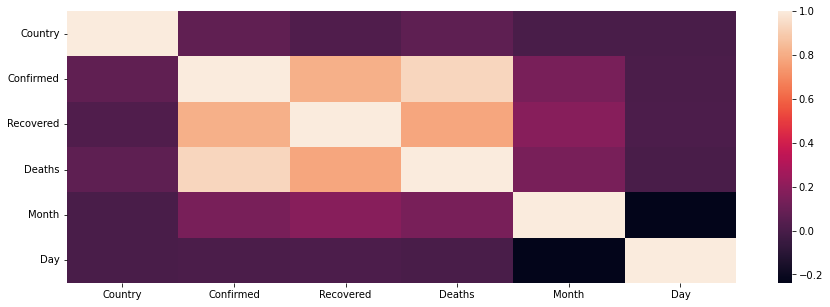

In [24]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr())

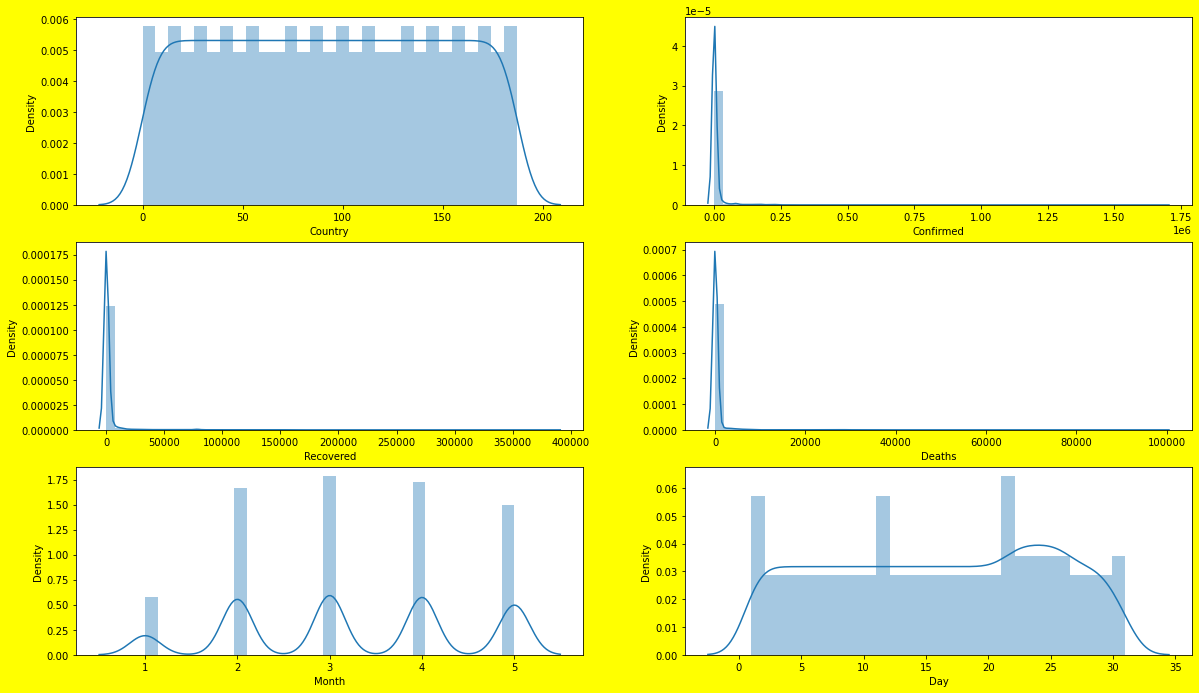

In [25]:
plt.figure(figsize=(20,20),facecolor="yellow")
plotnumber=1
for i in data:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=10)
    plotnumber+=1
plt.show()

In [26]:
for col in data.columns:
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

In [27]:
for i in data:
    print(i)
    print(skew(data[i]))

Country
0.0
Confirmed
0.5384356731228025
Recovered
1.0115256693224401
Deaths
1.5987318794448562
Month
-0.10759772842498257
Day
-0.0689277351697118


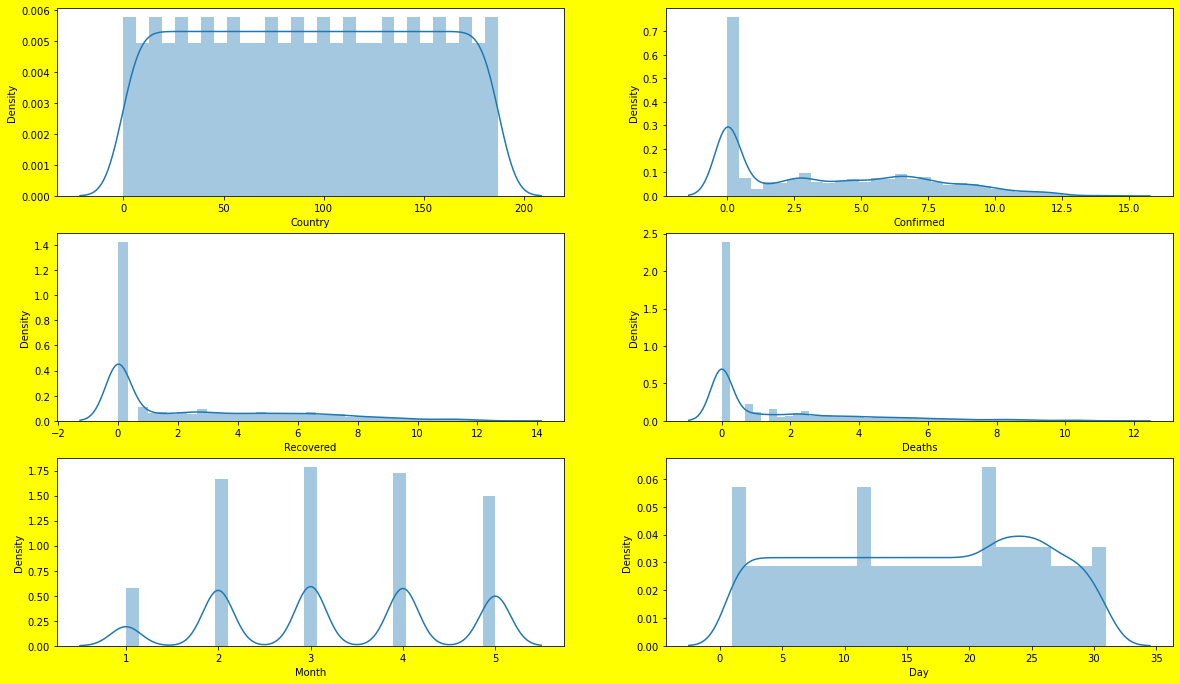

In [28]:
plt.figure(figsize=(20,20),facecolor="yellow")
plotnumber=1
for i in data:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=10)
    plotnumber+=1
plt.show()

# Univariate Analysis

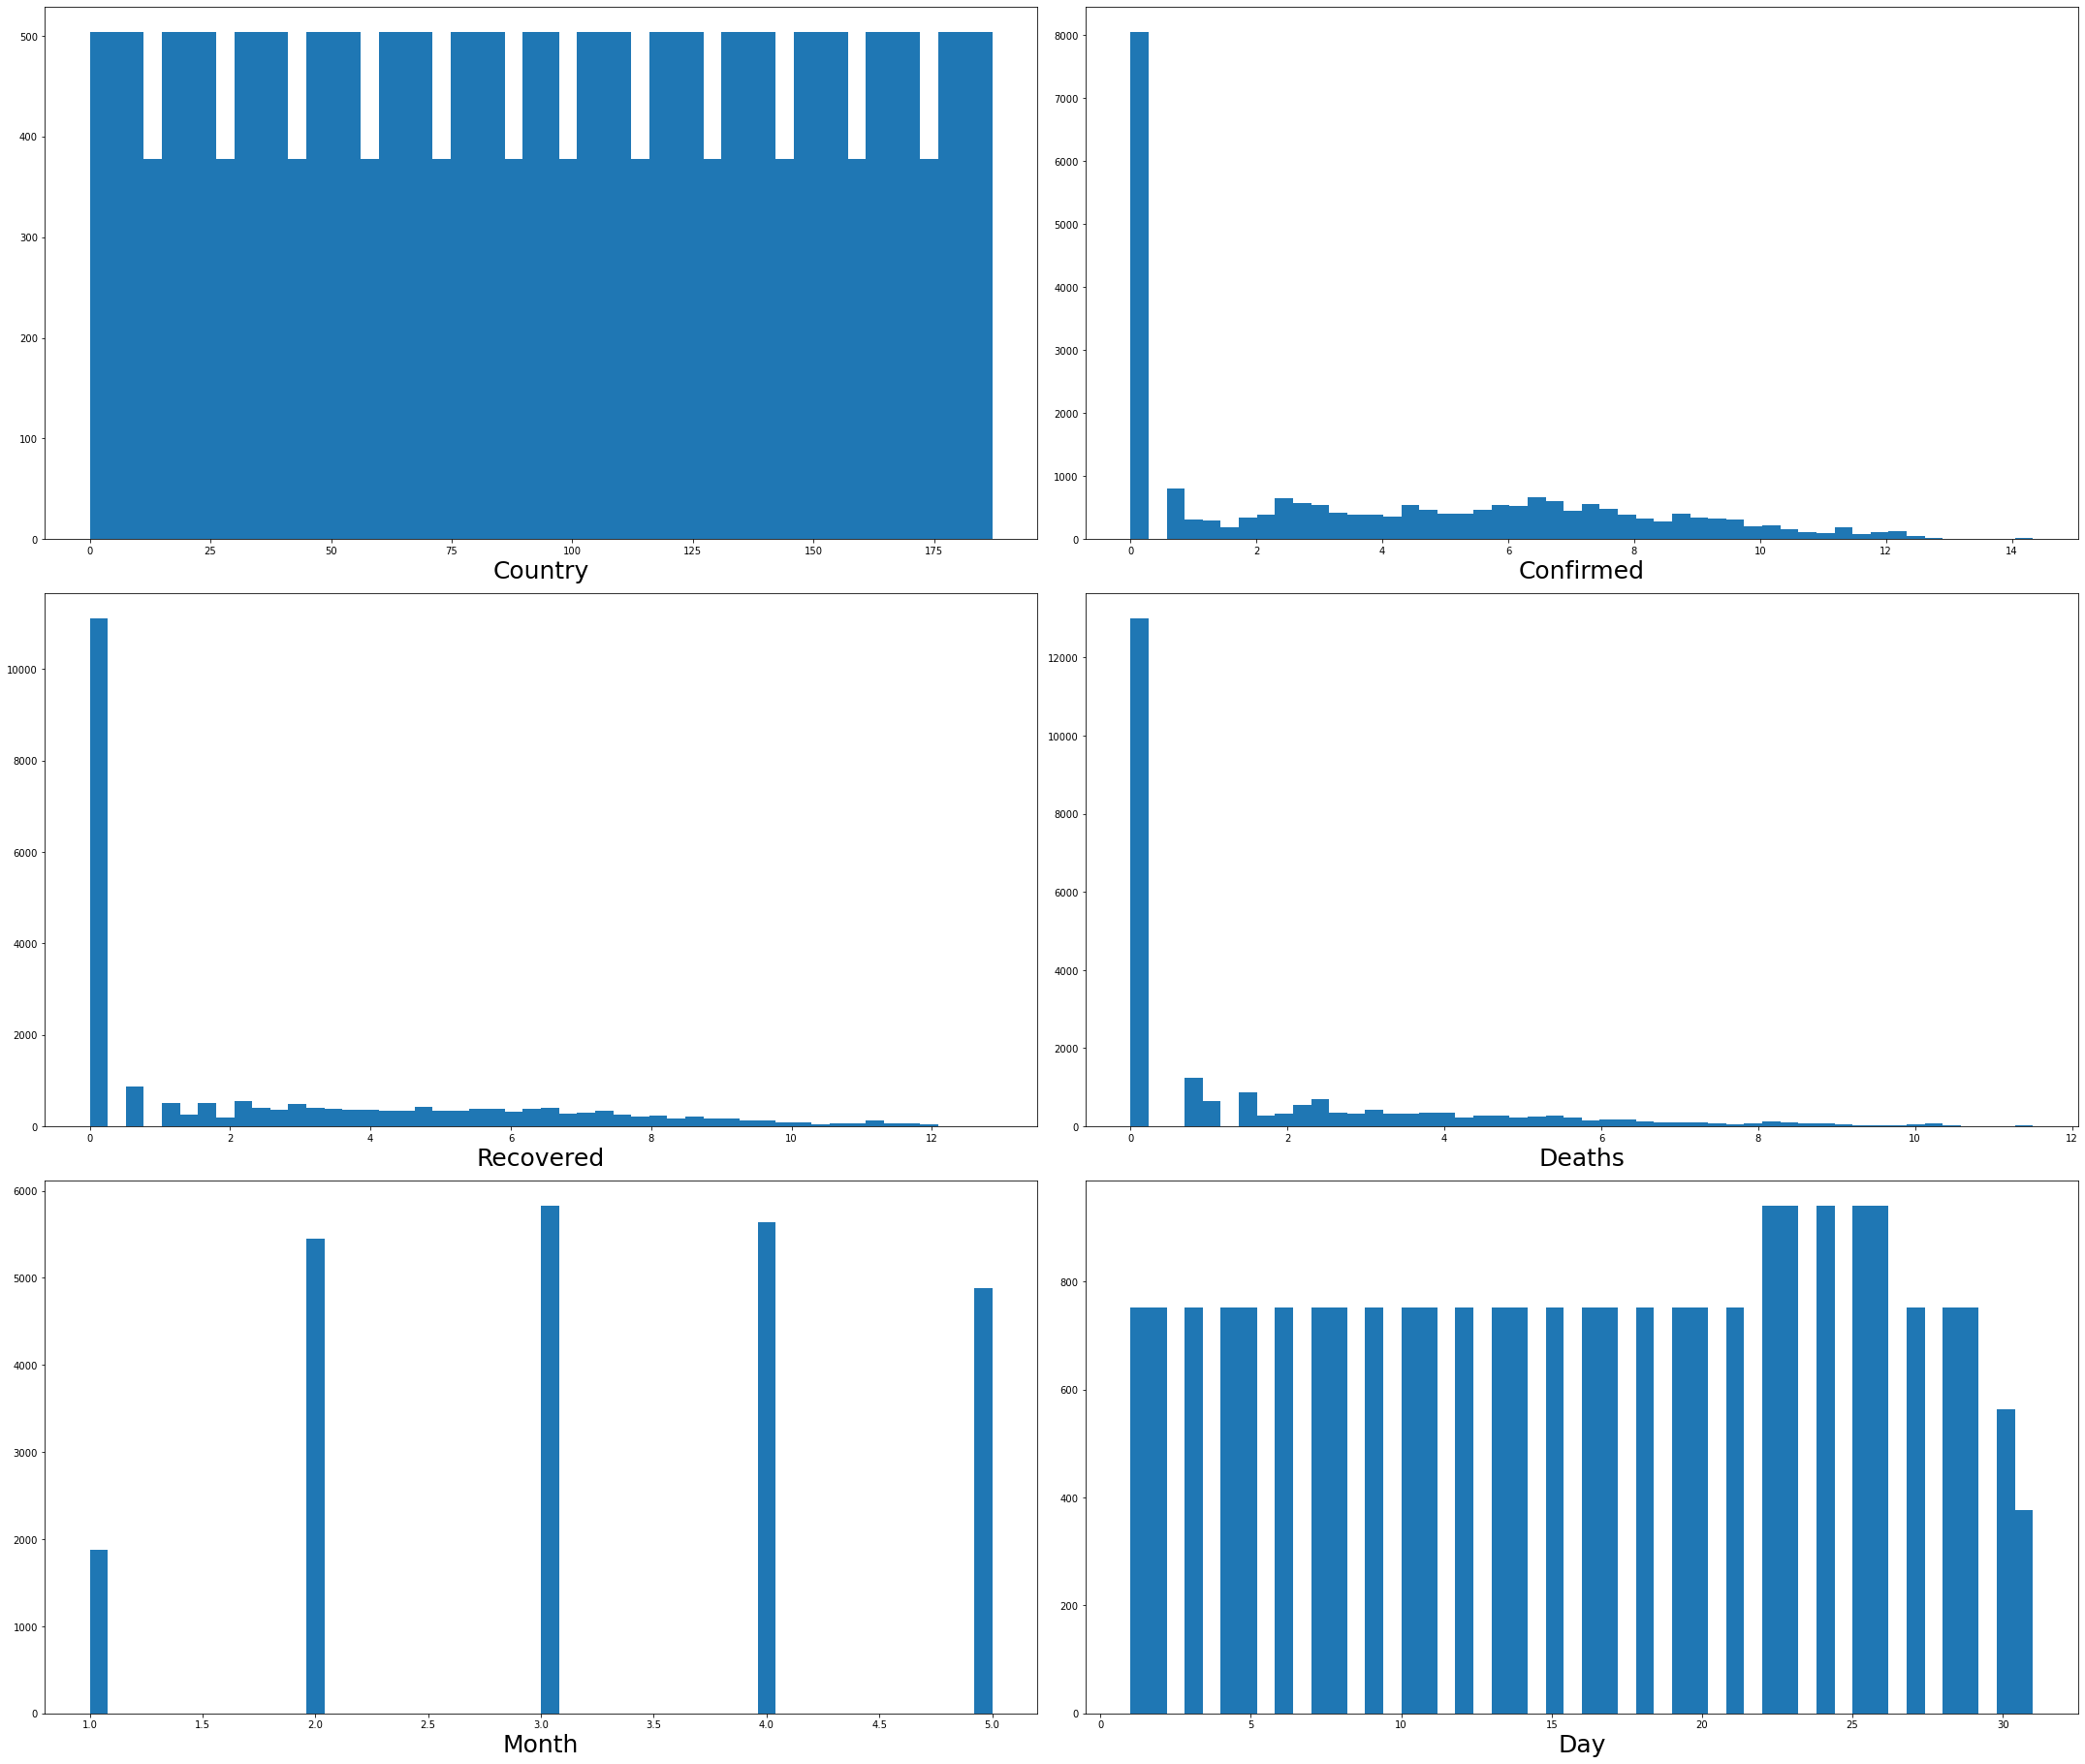

In [29]:
#histogram
plt.figure(figsize=[30,50])
plotnumber=1

for column in data:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        plt.hist(data[column], bins=50)
        plt.xlabel(column, fontsize=25)
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:xlabel='Confirmed', ylabel='Deaths'>

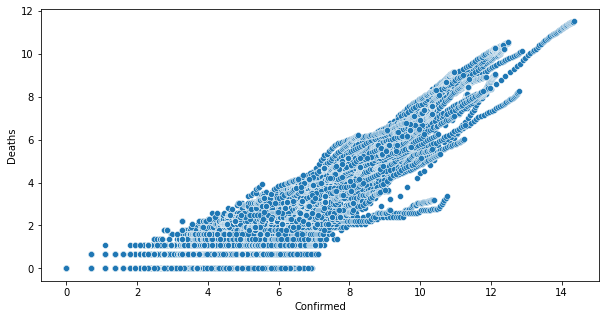

In [30]:
plt.figure(figsize=(10,5))
sns.scatterplot(x ="Confirmed", y = "Deaths" , data = data)

<AxesSubplot:xlabel='Confirmed', ylabel='Recovered'>

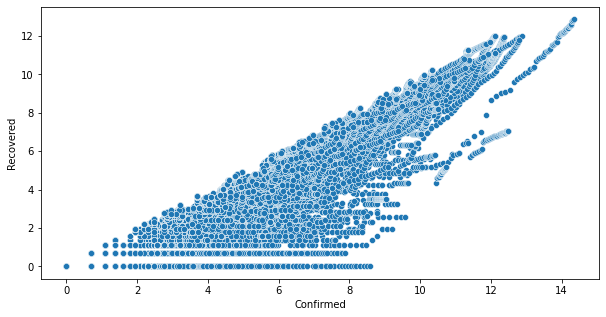

In [31]:
plt.figure(figsize=(10,5))
sns.scatterplot(x ="Confirmed", y = "Recovered" , data = data)

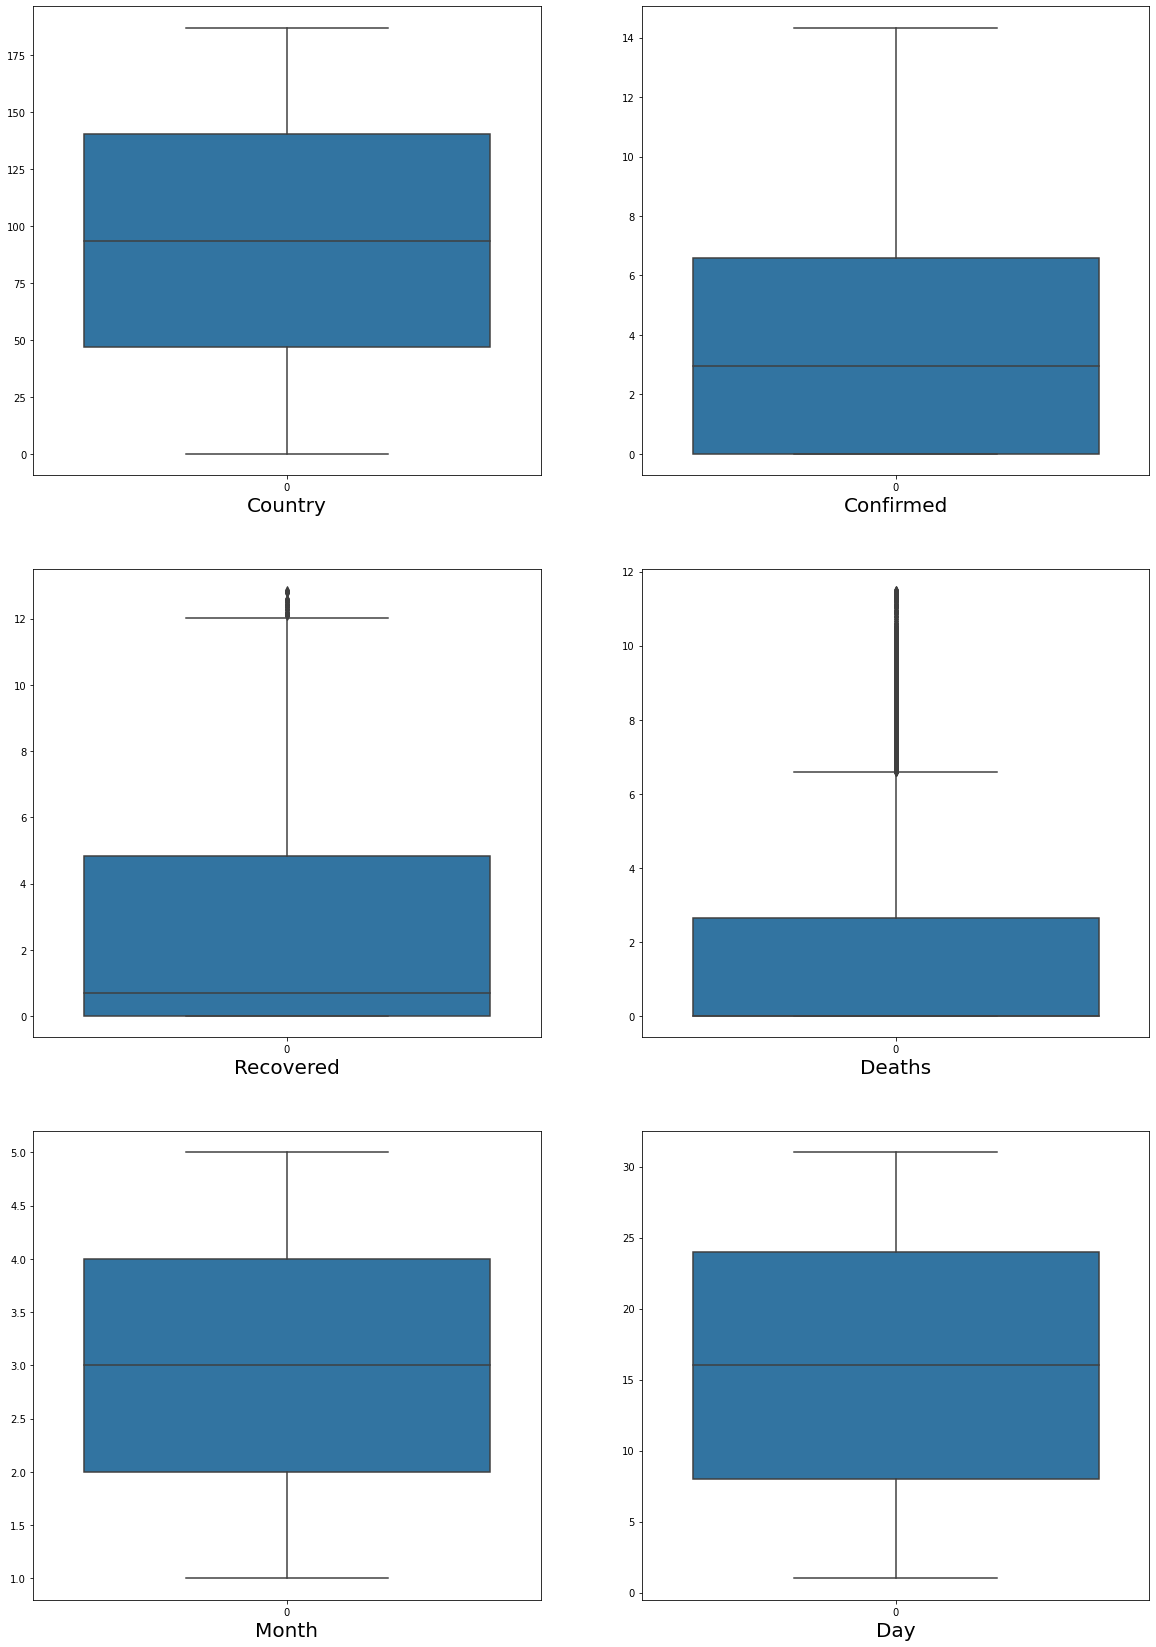

In [32]:
plt.figure(figsize=(20,50))
graph=1
for i in data:
    ax=plt.subplot(5,2,graph)
    sns.boxplot(data=data[i])
    plt.xlabel(i,fontsize=20)
    graph+=1
plt.show()

<AxesSubplot:>

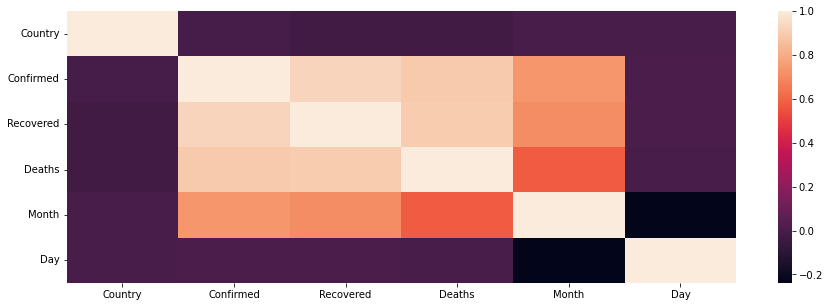

In [33]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr())

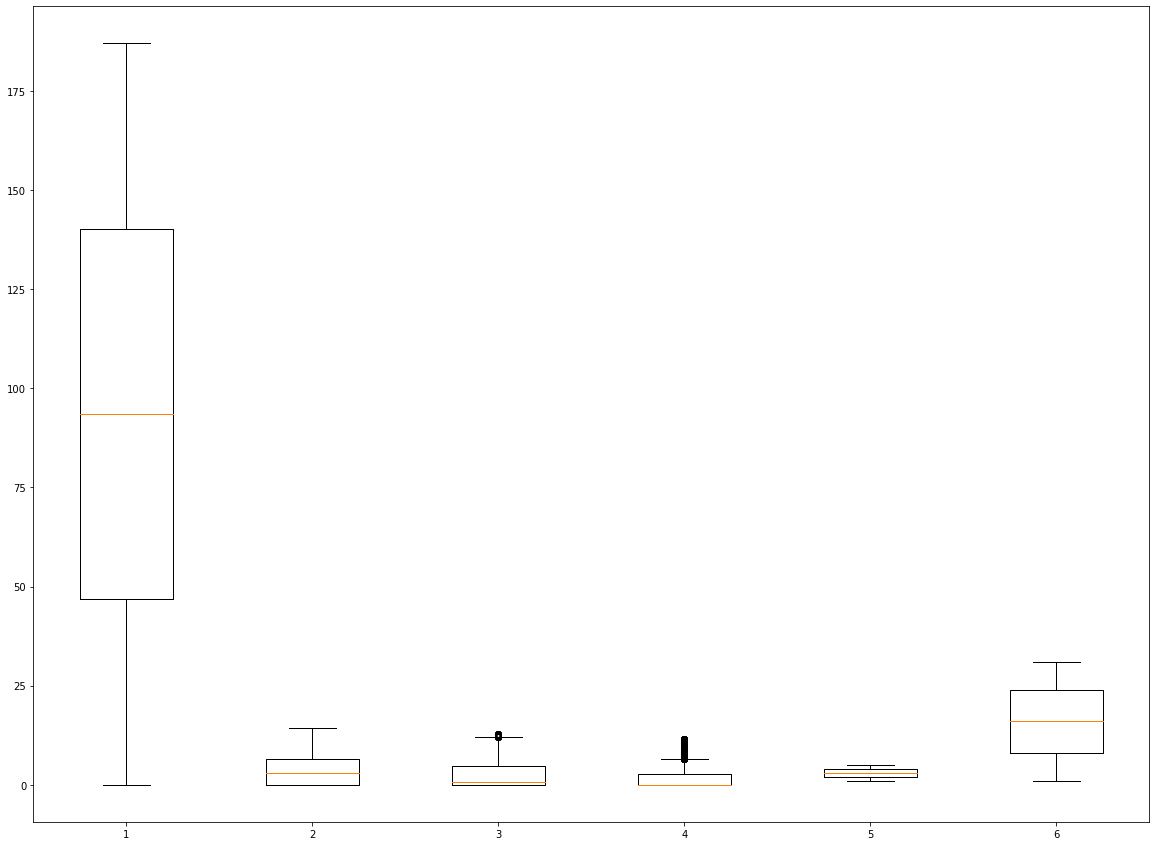

In [34]:
plt.figure(figsize=(20,15))
plt.boxplot(data)
plt.show()

We can see there is alot of Ouliers present in our data and hence it is not safe to proceed without dealing with them. So, let's deal with the outlier's problem

In [35]:
#1st Quantile
q1=data.quantile(0.25)

#3rd Quantile
q3=data.quantile(0.75)

iqr=q3-q1
print(iqr)

Country      93.500000
Confirmed     6.594413
Recovered     4.820282
Deaths        2.639057
Month         2.000000
Day          16.000000
dtype: float64


In [36]:
conf_high=(q3.Confirmed+(1.5*iqr.Confirmed))
recov_high=(q3.Recovered+(1.5*iqr.Recovered))
death_high=(q3.Deaths+(1.5*iqr.Deaths))

In [37]:
conf_high

16.486033649374445

In [38]:
data[data['Confirmed']>conf_high]

,Country,Confirmed,Recovered,Deaths,Month,Day


Let's do Capping to deal with the outliers in Confirmed column

In [39]:
new_data=data.copy()
new_data['Confirmed']=np.where(new_data['Confirmed']>conf_high, conf_high, new_data['Confirmed'])
new_data['Recovered']=np.where(new_data['Recovered']>recov_high, recov_high, new_data['Recovered'])
new_data['Deaths']=np.where(new_data['Deaths']>death_high, death_high, new_data['Deaths'])

In [40]:
new_data

,Country,Confirmed,Recovered,Deaths,Month,Day
0,0,0.000000,0.000000,0.000000,1,22
1,1,0.000000,0.000000,0.000000,1,22
2,2,0.000000,0.000000,0.000000,1,22
3,3,0.000000,0.000000,0.000000,1,22
4,4,0.000000,0.000000,0.000000,1,22
...,...,...,...,...,...,...
23683,183,6.063785,5.902633,1.386294,5,26
23684,184,2.302585,1.945910,0.693147,5,26
23685,185,5.521461,2.397895,3.912023,5,26
23686,186,6.825460,5.820083,2.079442,5,26


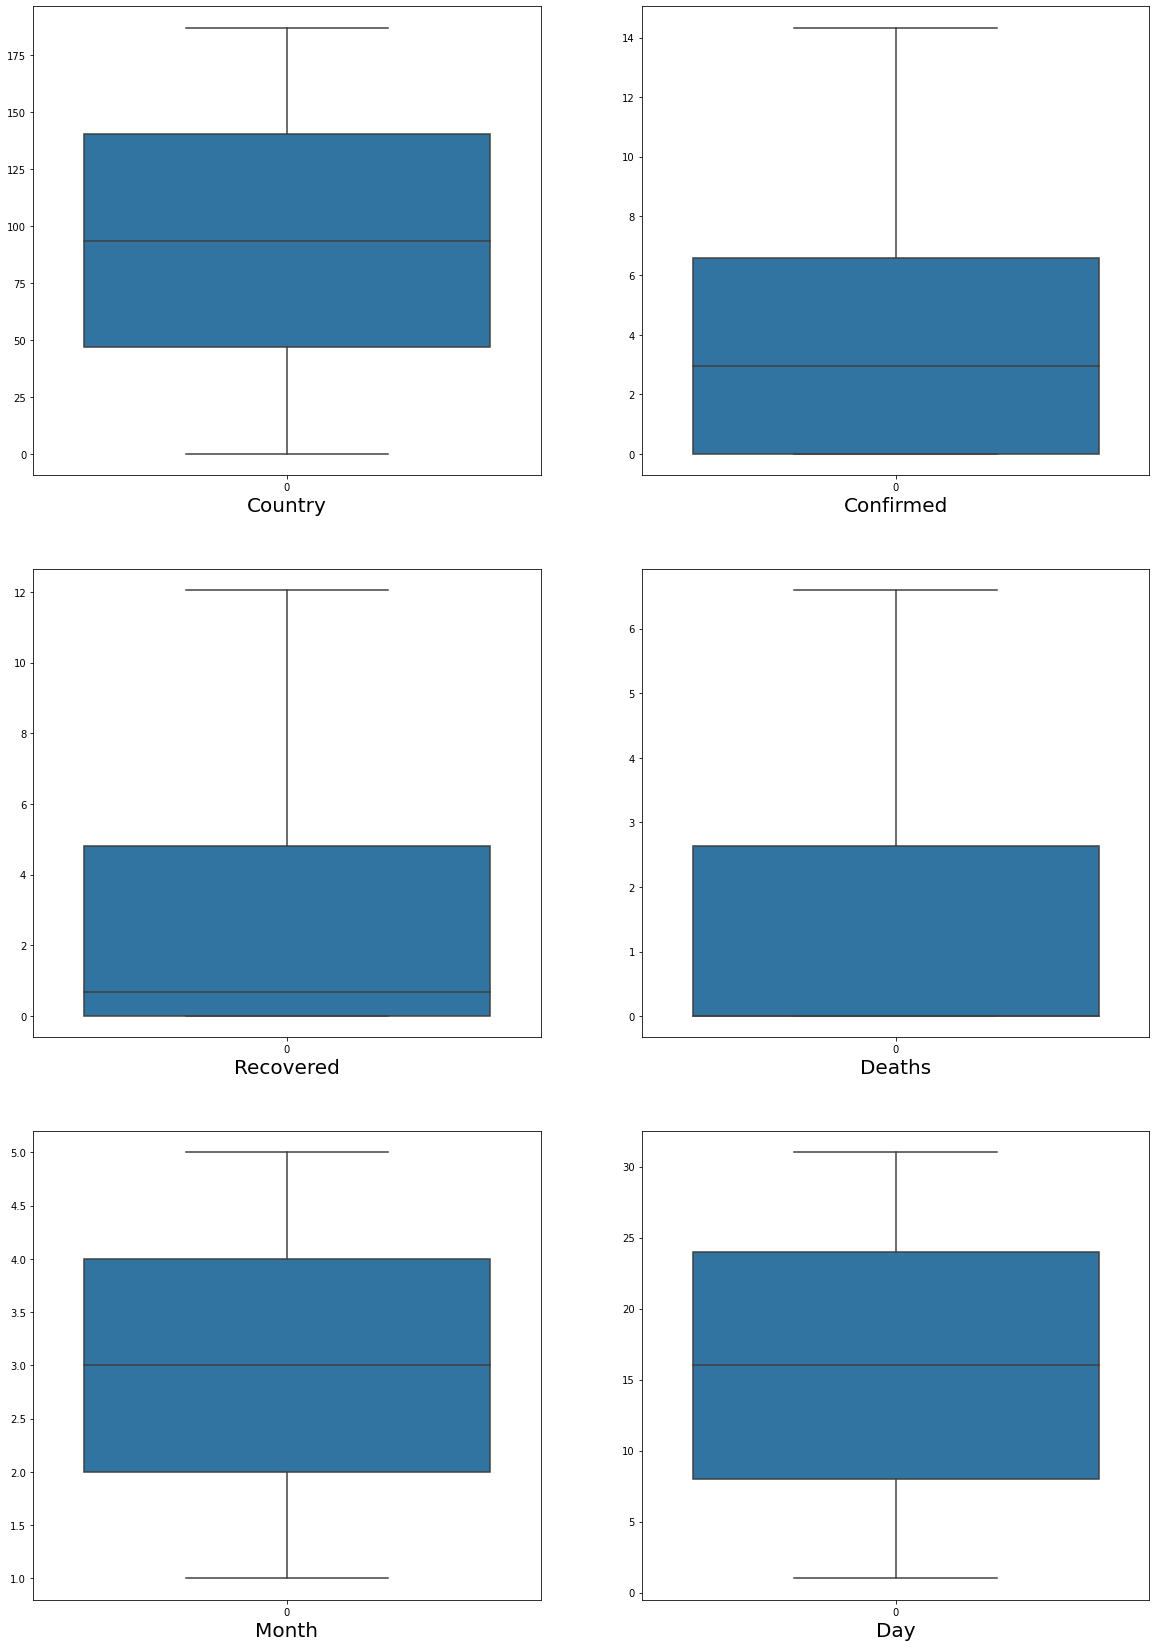

In [41]:
plt.figure(figsize=(20,50))
graph=1
for i in new_data:
    ax=plt.subplot(5,2,graph)
    sns.boxplot(data=new_data[i])
    plt.xlabel(i,fontsize=20)
    graph+=1
plt.show()

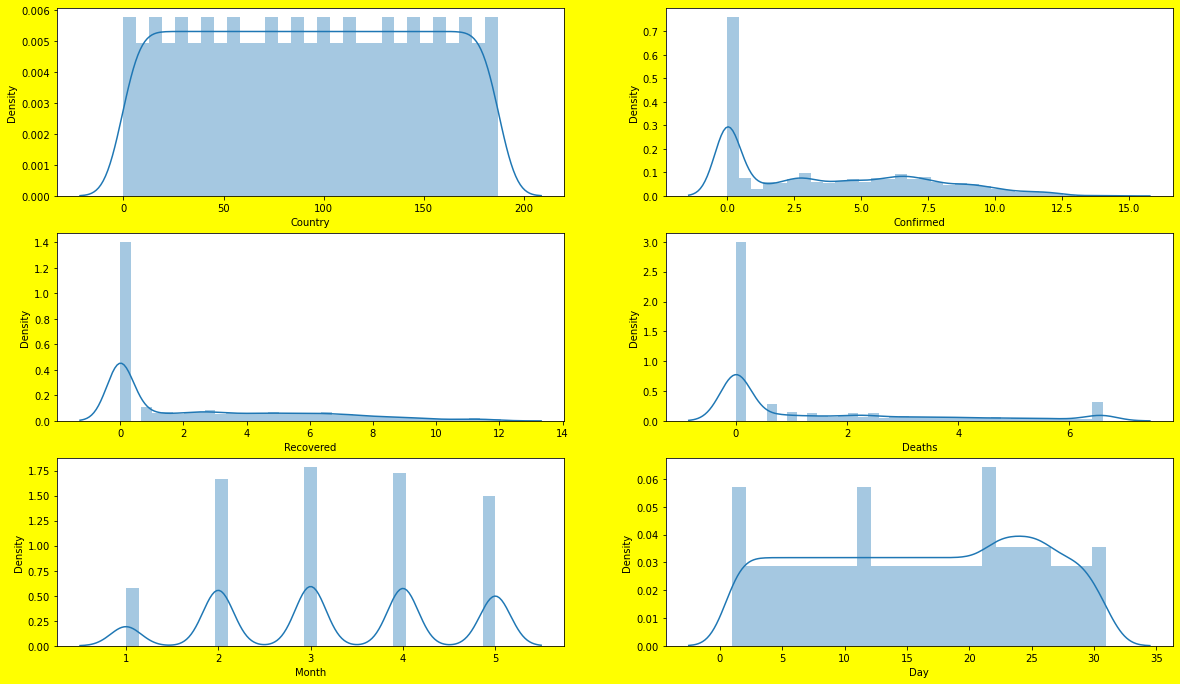

In [42]:
plt.figure(figsize=(20,20),facecolor="yellow")
plotnumber=1
for i in new_data:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.distplot(new_data[i])
        plt.xlabel(i,fontsize=10)
    plotnumber+=1
plt.show()

Above results suggests us that we successfully capped the outliers in our data. Let's proceed towards our model building and see how it performs and check if our model/data requires any additional processing

In [43]:
x=new_data.drop("Confirmed", axis=1)
y=new_data['Confirmed']

In [44]:
print("X shape", x.shape)
print("*" *50)
print("Y shape", y.shape)

X shape (23688, 5)
**************************************************
Y shape (23688,)


In [45]:
#Let's start with feature scaling
from sklearn.preprocessing import StandardScaler

In [46]:
sc = StandardScaler()

In [47]:
scaled_x=sc.fit_transform(x)

Now our X data is scaled and ready for further processing. Let's check for Multicolinearity using VIF (variance_inflation_factor)

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF score'] = [variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
print(vif)

    Features  VIF score
0    Country   3.477905
1  Recovered  10.367888
2     Deaths   8.053334
3      Month   6.587944
4        Day   2.911079


Different theories suggest different VIF values to be acceptable, some suggest it should be <5 whereas some suggest it sould be <10. I trust, we can accept upto VIF score 10, that we got so let's move ahead for further processing

In [50]:
#train_test_split
from sklearn.model_selection import train_test_split,GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,test_size=0.30)

In [51]:
print("Training Data shape \n", x_train.shape, "\n", y_train.shape)

Training Data shape 
 (16581, 5) 
 (16581,)


In [52]:
print("Testing Data shape \n", x_test.shape, "\n", y_test.shape)

Testing Data shape 
 (7107, 5) 
 (7107,)


In [53]:
#Let's import all the regressor models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [54]:
lr=LinearRegression()
knn=KNeighborsRegressor()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
gbr=GradientBoostingRegressor()

In [55]:
lr.fit(x_train,y_train)

LinearRegression()

In [56]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [57]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [58]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [59]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

Now let's check for Training score, which model performed well during training phase

In [60]:
#Training Scores
print("Linear Regression Training Score",lr.score(x_train, y_train))

Linear Regression Training Score 0.9011285131388691


In [61]:
print("KNeighborsRegressor Training Score",knn.score(x_train, y_train))

KNeighborsRegressor Training Score 0.975400521003493


In [62]:
print("Decision Tree regressor Training Score",dt.score(x_train, y_train))

Decision Tree regressor Training Score 1.0


In [63]:
print("Random Forest Regressor Training Score",rf.score(x_train, y_train))

Random Forest Regressor Training Score 0.9988415001684872


In [64]:
print("GradientBoost Regressor Training Score",gbr.score(x_train, y_train))

GradientBoost Regressor Training Score 0.9577789711023375


In [65]:
#Testing/Predictions Begins from here

lr_pred=lr.predict(x_test)

In [66]:
knn_pred=knn.predict(x_test)

In [67]:
dt_pred=dt.predict(x_test)

In [68]:
rf_pred=rf.predict(x_test)

In [69]:
gbr_pred=gbr.predict(x_test)

In [70]:
#Prediction Score
print("Linear Regression Testing Score",lr.score(x_test, y_test))

Linear Regression Testing Score 0.8995286214366337


In [71]:
print("KNeighborsRegressor Testing Score",knn.score(x_test, y_test))

KNeighborsRegressor Testing Score 0.9628726396711503


In [72]:
print("Decision Tree Regressor Testing Score",dt.score(x_test, y_test))

Decision Tree Regressor Testing Score 0.985377556265029


In [73]:
print("Random Forest Regressor Testing Score",rf.score(x_test, y_test))

Random Forest Regressor Testing Score 0.9916763113925752


In [74]:
print("GradientBoost Regressor Testing Score",gbr.score(x_test, y_test))

GradientBoost Regressor Testing Score 0.9570414676079022


Looking at these kind of scores  feels good but deep down we know, my model has went through overfitting and I have to perform following tasks:

Reducing the skewness of the data

Cross Validation

Hyper-Parameter tuning

In [75]:
#Let's try some Cross Validation 
from sklearn.model_selection import cross_val_score

In [76]:
print(cross_val_score(RandomForestRegressor(), x, y, cv=10))

[0.42063161 0.91921766 0.90657383 0.5214375  0.84964182 0.89717
 0.949639   0.95004174 0.96081016 0.9632223 ]


In [77]:
print(cross_val_score(DecisionTreeRegressor(), x, y, cv=10))

[0.27500842 0.92646785 0.79800553 0.10093884 0.82850544 0.8497106
 0.89833855 0.9157652  0.92135842 0.92715675]


We can see, RandomForest is giving much better accuracy so let's move ahead doing hyperparameter tuning on RandomForest model

In [85]:
#Let do some Hyperparameter tuning

grid_param={
    'criterion':['mse'],
    'max_depth':range(2,10),
    'min_samples_leaf':range(2,10),
    'min_samples_split': range(2,10),
    'max_leaf_nodes':range(1,5)
}

In [86]:
grid_search=GridSearchCV(estimator=RandomForestRegressor(),param_grid=grid_param,cv=5,n_jobs=-1)

In [87]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse'], 'max_depth': range(2, 10),
                         'max_leaf_nodes': range(1, 5),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)})

In [88]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'mse', 'max_depth': 7, 'max_leaf_nodes': 4, 'min_samples_leaf': 2, 'min_samples_split': 7}


In [89]:
rf1=RandomForestRegressor(criterion='mse',max_leaf_nodes=4,min_samples_split=7,max_depth=7,min_samples_leaf=2)

In [90]:
rf1.fit(x_train,y_train)

RandomForestRegressor(criterion='mse', max_depth=7, max_leaf_nodes=4,
                      min_samples_leaf=2, min_samples_split=7)

In [91]:
rf1.score(x_test,y_test)

0.8840195923501005

# Hence, This is the final model accuracy of our model

Jai shri Ram!